<a href="https://colab.research.google.com/github/Akshaythakur01/Applied_Statistic_practice/blob/master/Stats_with_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/Akshaythakur01/Applied_Statistic_practice/master/Dataset_Akshay/Churn_data.csv')

In [3]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


Total charges is having missing values



In [6]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [7]:
print('Rows : ',churn_df.shape[0])
print('Columns : ',churn_df.shape[1])
print('\nFeatures : \n',churn_df.columns.tolist())
print('\nMissing values : \n',churn_df.isnull().any())
print('\nUnique values : \n',churn_df.nunique())

Rows :  7043
Columns :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values : 
 customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Unique values : 
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [8]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [9]:
churn_df[churn_df['tenure']==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [10]:
churn_df['TotalCharges'].describe()


count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

Huge difference between mean and median


In [11]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


Again huge difference between mean and median


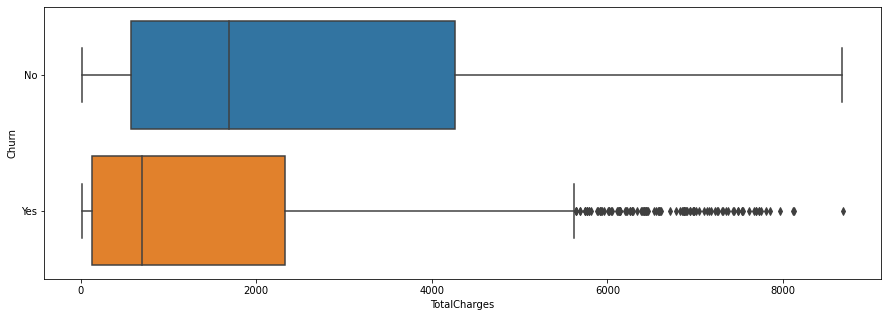

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x='TotalCharges',y='Churn',data=churn_df)

Outliers in the Yes section and also there is significant difference between the max and mean of No section

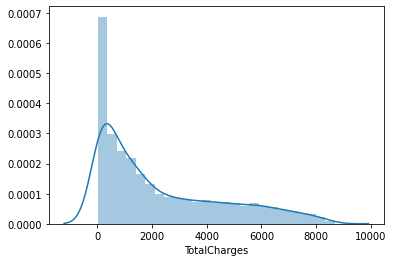

In [13]:
sns.distplot(churn_df['TotalCharges'],hist=True)

Distribution is right skewed

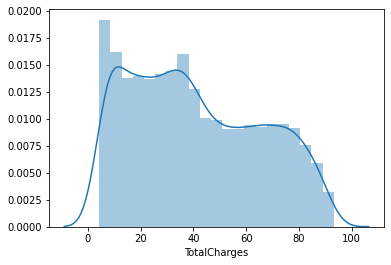

In [14]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt),hist=True)

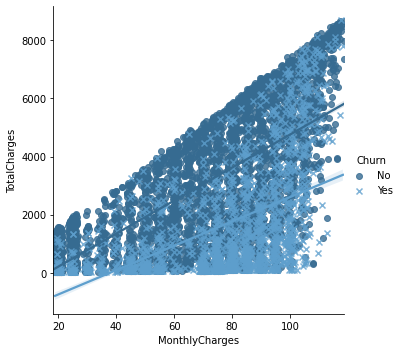

In [15]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True,hue='Churn',markers=['o','x'],palette='Blues_d')

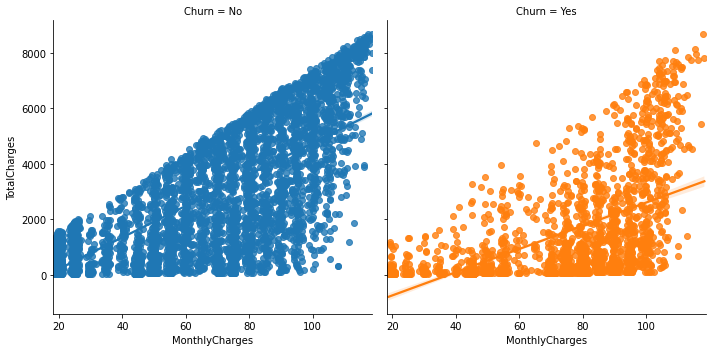

In [16]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True,col='Churn',hue='Churn')

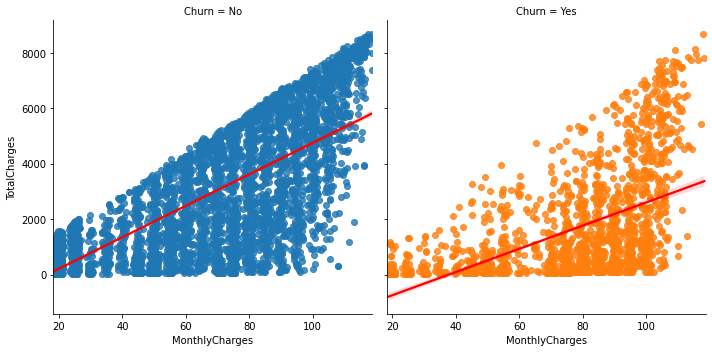

In [17]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True,col='Churn',hue='Churn',line_kws={'color':'red'})

In [18]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [19]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()


,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [20]:
churn_no_df=churn_df[(churn_df['Churn']=='No')&(churn_df['TotalCharges'].isna()==False)]
churn_no_df.shape[0]

5147

In [21]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [22]:
from scipy import stats
slope,intercept,r_value,p_value,std_err=stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [23]:
print('slope : ',slope)
print('intercept : ',intercept)
print('r_value : ',r_value)
print('p_value : ',p_value)
print('std_err : ',std_err)
print('r_squared : ',r_value**2)


slope :  56.73637552696062
intercept :  -922.8160085118097
r_value :  0.7573902887184033
p_value :  0.0
std_err :  0.6819261867835148
r_squared :  0.5736400494449463


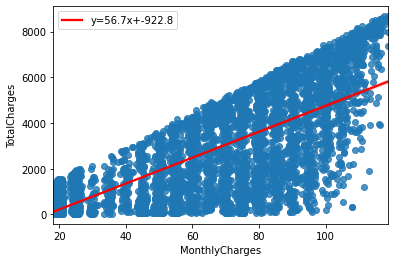

In [25]:
ax = sns.regplot(x='MonthlyCharges',y='TotalCharges',data=churn_no_df,line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')

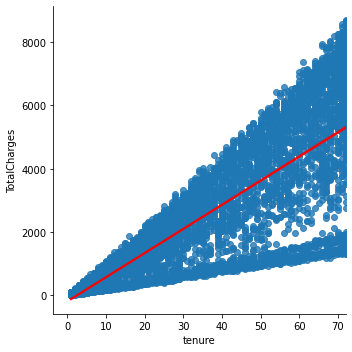

In [26]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True,line_kws={'color':'red'})

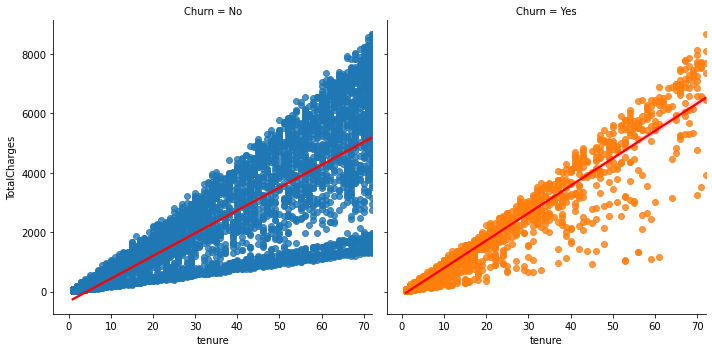

In [27]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True,col='Churn',hue='Churn',line_kws={'color':'red'})

In [28]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [29]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [30]:
slope,intercept,r_value,p_value,std_err=stats.linregress(churn_no_df['tenure'],churn_no_df['TotalCharges'])

In [31]:
print('slope : ',slope)
print('intercept : ',intercept)
print('r_value : ',r_value)
print('p_value : ',p_value)
print('std_err : ',std_err)
print('r_squared : ',r_value**2)

slope :  76.74259761920021
intercept :  -334.08560506046933
r_value :  0.793287728023258
p_value :  0.0
std_err :  0.8211475250987232
r_squared :  0.6293054194323026


Standard error is high

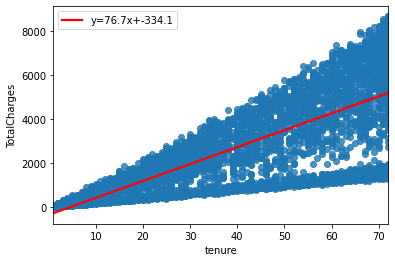

In [32]:
ax = sns.regplot(x='tenure',y='TotalCharges',data=churn_no_df,line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')

In [33]:
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [35]:
churn_no_df[churn_no_ df['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


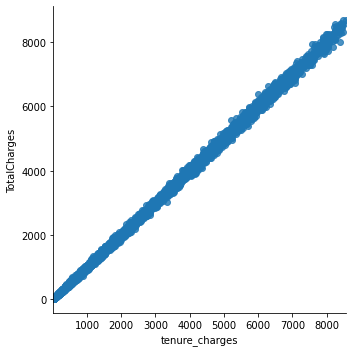

In [36]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_no_df)

In [37]:
slope,intercept,r_value,p_value,std_err=stats.linregress(churn_no_df['tenure_charges'],churn_no_df['TotalCharges'])

In [38]:
print('slope : ',slope)
print('intercept : ',intercept)
print('r_value : ',r_value)
print('p_value : ',p_value)
print('std_err : ',std_err)
print('r_squared : ',r_value**2)

slope :  1.0001720821518205
intercept :  -0.3010983695039613
r_value :  0.9995350350972924
p_value :  0.0
std_err :  0.00042536192429779864
r_squared :  0.9990702863869455


Standard error is reduced substantially

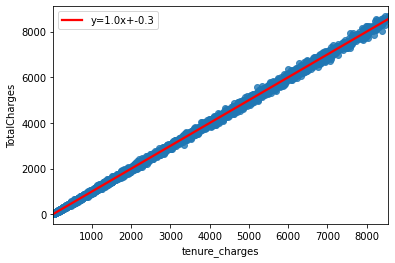

In [39]:
ax = sns.regplot(x='tenure_charges',y='TotalCharges',data=churn_no_df,line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc='best')

In [40]:
def fillna(tenure,monthlycharge):
  if tenure==0:
    totalcharges=monthlycharge
  else:
    totalcharges=tenure*monthlycharge
    totalcharges=intercept +(totalcharges*slope)
  return round(totalcharges,2)


In [42]:
churn_df['totalchargesnew']=churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']),axis=1)

In [44]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,totalchargesnew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96


In [45]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/Akshaythakur01/Applied_Statistic_practice/master/Dataset_Akshay/churn_data_actual.csv')

In [46]:
churn_merged = pd.merge(churn_df,churn_actual_df)


In [47]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,totalchargesnew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96,279.2
